# Kmeans clustering on MNIST handwritten digits

# Setup

In [1]:
from typing import (
    List,
    Dict,
    Any,
    Tuple,
    Callable,
    Union,
    Optional,
)
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.text import TextPath

In [2]:
sys.path.append(os.getcwd())

In [3]:
from utility import (
    load_digit_data,
    pca_reduce_data,
)

# Data

In [4]:
data, labels, n_digits = load_digit_data()
X: np.ndarray = pca_reduce_data(data=data, n_components=2)

# digits: 10; # samples: 1797; # features 64


In [5]:
print(f"X.shape {X.shape}, min: {X.min()} max: {X.max()}")

X.shape (1797, 2), min: -31.16988680514131 max: 31.700163961980614


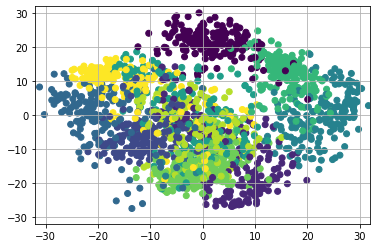

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlim(-32, 32)
plt.ylim(-32, 32)
plt.grid()

# Standardize

In [7]:
X_meaned: np.ndarray = X - X.mean(axis=0)
X_scaled: np.ndarray = X_meaned / X.std(axis=0)

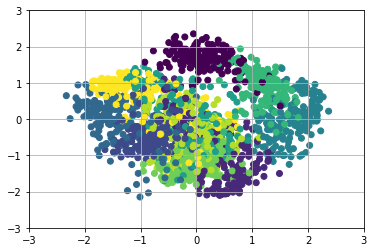

In [8]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.grid()

# Clusteing

In [9]:
from main import KMeans

In [12]:
kmeans = KMeans()
X, centroids, labels = kmeans.fit_transform()

# digits: 10; # samples: 1797; # features 64


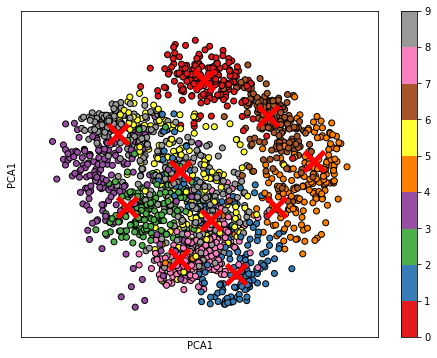

In [13]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
# [color bar]
# https://stackoverflow.com/questions/6063876/matplotlib-colorbar-for-scatter
sc = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=plt.cm.Set1, edgecolor="k")
plt.colorbar(sc)
plt.xlabel("PCA1")
plt.ylabel("PCA1")

# Plot centroids
for i in range(len(centroids)):
    # label = TextPath((0,0), str(i))
    # [marker thickness] https://stackoverflow.com/questions/17285163/
    plt.plot(centroids[i, 0], centroids[i, 1], color="red", marker="x", markersize=20, mew=5)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()